In [57]:
#symmetry_dict=dict()
#blue_dict=dict()
#green_dict=dict()
#red_dict=dict()
#border_dict=dict()

In [40]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# Set some parameters
im_width = 128
im_height = 128
img_channels=3

In [4]:
import os
filelist=os.listdir("/home/seo/ISIC DATA")
meta=[file for file in filelist if not file.endswith(".jpeg") and not file.endswith(".png") and file.startswith("ISIC")]
pics=[file for file in filelist if (file.endswith(".jpeg") or file.endswith(".png")) and file.startswith("ISIC")]
masklist=os.listdir("/home/seo/Masks")
masks=[file for file in masklist if file.endswith(".png") and file.startswith("ISIC")]
mask2=[file.split('_segmentation')[0] for file in masklist if file.endswith(".png") and file.startswith("ISIC")]
train_pics=[file for file in pics if file.split('.jpeg')[0] in mask2]
test_pics=[file for file in pics if file.split('.jpeg')[0] not in mask2]

from tqdm import tqdm_notebook
images = np.zeros((len(train_pics), im_height, im_width, img_channels), dtype=np.uint8)
labels = np.zeros((len(train_pics), im_height, im_width, 1), dtype=np.bool)
for n, id_ in tqdm_notebook(enumerate(train_pics), total=len(train_pics)):
    img = imread("/home/seo/ISIC DATA/"+str(id_))[:,:,:img_channels]
    img = resize(img, (im_height, im_width), mode='constant', preserve_range=True)
    images[n] = img
    mask = np.zeros((im_height, im_width, 1), dtype=np.bool)
    for mask_file in next(os.walk("/home/seo/Masks"))[2]:
        mask_ = imread("/home/seo/Masks/"+id_.split('.')[0]+'_segmentation.png')
        mask_ = np.expand_dims(resize(mask_, (im_height, im_width), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    labels[n] = mask

X_train = images
Y_train = labels


In [5]:
def split_into_rgb_channels(image):
    """Split the target image into its red, green and blue channels.image - a numpy array of shape (rows, columns, 3).
    output - three numpy arrays of shape (rows, columns) and dtype same as
    image, containing the corresponding channels.
    """
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]
    return red, green, blue

In [6]:
def rotate_bound(image, angle,cX,cY):
    # grab the dimensions of the image
    (h, w) = image.shape[:2] 
    # grab the rotation matrix, then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))


In [7]:
def mse(imageA, imageB,contour_size):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(contour_size)
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [8]:
def get_mag_ang(img):

    """
    Gets image gradient (magnitude) and orientation (angle)

    Args:
        img

    Returns:
        Gradient, orientation
    """

    img = np.sqrt(img)

    gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1)

    mag, ang = cv2.cartToPolar(gx, gy)

    return mag, ang, gx, gy 

In [9]:
def choose_img(name):
    img = load_img(name, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
    # Save images
    X = x_img/255.0
    return X

In [10]:
images = np.zeros((len(pics),im_height, im_width, 1), dtype=np.float32)

In [11]:
name="/home/seo/ISIC DATA/"+pics[i]
label=pics[i].split('.')[0]

In [12]:
orig_img=cv2.imread(name, cv2.IMREAD_COLOR)[...,::-1]
img=orig_img

#normalize image

norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

img=norm_image

#split image into RGB channels

r,g,b=split_into_rgb_channels(img)

#reduce noise
# Do some denoising on blue channel because that usually gives best contrast
gaussian = cv2.GaussianBlur(b,(3,3),0)

x_img = img_to_array(orig_img)
x_img=resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)


In [13]:
import numpy as np

In [14]:
from numpy import array, newaxis, expand_dims

In [15]:
#img = load_img(name, grayscale=False)
x_img = img_to_array(img)
x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
x_img=x_img/255.0
x_img2=x_img[newaxis,:,:,:]
x_img2.ndim

4

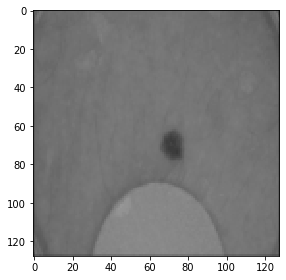

In [43]:
#imshow(x_img.squeeze())

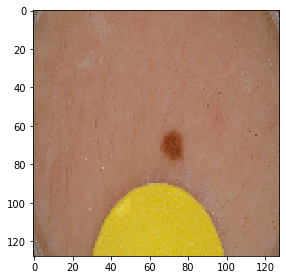

In [41]:
resized = cv2.resize(orig_img,(128,128))
#imshow(resized)

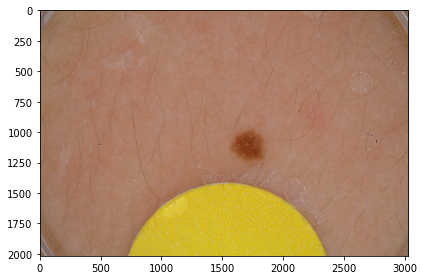

In [42]:
#imshow(orig_img)

In [23]:
import pickle
#model=pickle.load(open('model.pickle',"rb"))
#model=pickle.load(open('model_fitted.pickle',"rb"))

W0722 16:02:30.894797 139912097081152 deprecation_wrapper.py:119] From /home/seo/environments/my_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 16:02:30.917195 139912097081152 deprecation_wrapper.py:119] From /home/seo/environments/my_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0722 16:02:30.941279 139912097081152 deprecation_wrapper.py:119] From /home/seo/environments/my_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 16:02:30.942341 139912097081152 deprecation_wrapper.py:119] From /home/seo/environments/my_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated

In [24]:
pred=model.predict(x_img2)
preds_t = (pred > 0.5).astype(np.uint8)

In [25]:
pred.squeeze()

array([[0.02080083, 0.01623666, 0.01027954, ..., 0.00511405, 0.00765699,
        0.02311346],
       [0.01938084, 0.01342967, 0.0080584 , ..., 0.00298342, 0.00443694,
        0.00966892],
       [0.00796458, 0.00868908, 0.00483432, ..., 0.00145495, 0.00209141,
        0.00514212],
       ...,
       [0.00458196, 0.00313631, 0.00235915, ..., 0.00136867, 0.00175187,
        0.00526747],
       [0.00456232, 0.0025416 , 0.00250044, ..., 0.00114417, 0.00162864,
        0.00525922],
       [0.01722375, 0.0082792 , 0.00851211, ..., 0.00390753, 0.00793737,
        0.00817263]], dtype=float32)

In [26]:
orig_mask=preds_t.squeeze()

In [46]:
import scipy.ndimage as ndimage

In [47]:
dilated=ndimage.binary_dilation(orig_mask,structure=np.ones((5,5))).astype(orig_mask.dtype)
eroded= ndimage.binary_erosion(dilated).astype(orig_mask.dtype)
mask=eroded

/home/seo/environments/my_env/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3ee2424b70>,
 <matplotlib.image.AxesImage at 0x7f3ee0b1cac8>)

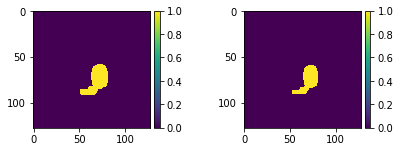

In [44]:
#plt.subplot(2,2,1),imshow(dilated)
#plt.subplot(2,2,2),imshow(eroded)

In [48]:
x_img3=x_img2.squeeze()

In [49]:
import cv2
dst = cv2.bitwise_and(x_img3, x_img3, mask=mask)

In [50]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [51]:
cnt=contours
M = cv2.moments(cnt)

In [52]:
(a,b),(MA,ma),angle = cv2.fitEllipse(cnt)
a=int(a)
b=int(b)
contourSize = cv2.contourArea(cnt)

In [53]:
def rotate_bound(image, angle,cX,cY):
    # grab the dimensions of the image
    (h, w) = image.shape[:2] 
    # grab the rotation matrix, then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

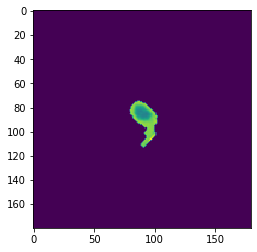

In [55]:
rotated_roi=rotate_bound(dst,angle,a,b)
#plt.imshow(rotated_roi)

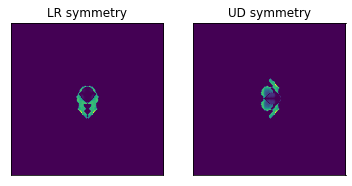

In [58]:
from mpl_toolkits.axes_grid1 import AxesGrid

imageO=rotated_roi
imageLR=np.fliplr(rotated_roi)
imageUD=np.flipud(rotated_roi)
#plt.subplot(1,2,1),plt.imshow((imageO.astype("float")-imageLR.astype("float"))**2),plt.title('LR symmetry'),plt.xticks([]),plt.yticks([])
#plt.subplot(1,2,2),plt.imshow((imageO.astype("float")-imageUD.astype("float"))**2),plt.title('UD symmetry'),plt.xticks([]),plt.yticks([])

lr=mse(rotated_roi, np.fliplr(rotated_roi),contourSize)
ud=mse(rotated_roi, np.flipud(rotated_roi),contourSize)

#symmetry_dict[label]=(lr+ud)/2


Text(0.5, 1.0, 'color distribution')

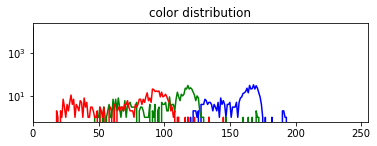

In [59]:
colorcheck = cv2.bitwise_and(resized, resized, mask=mask)
color = ('b','g','r')
#fig=plt.figure()
zerovalues=list()
#ax=fig.add_subplot(2,1,1)
b_list=[]
g_list=[]
r_list=[]
for i,col in enumerate(color):
    histr = cv2.calcHist([colorcheck],[i],None,[256],[0,256])
    #ax.plot(histr,color = col)
    zerovalues.append(histr[0])
    histr=histr[1:]
    #plt.xlim([0,255])
    #ax.set_yscale('log')
    if col=='b':
        blue_dict[label]=histr.std()
    if col=='g':
        green_dict[label]=histr.std()
    if col=='r':
        red_dict[label]=histr.std()
#plt.title("color distribution")

(<matplotlib.image.AxesImage at 0x7f3ee0816470>,
 Text(0.5, 1, 'Result after applying mask'))

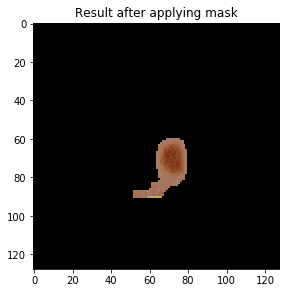

In [60]:
#imshow(colorcheck),plt.title('Result after applying mask')

In [92]:
H,W = resized.shape[:2]
h=20; w=20
tots_gradient=[]
for point in cnt[:,0]:
    x=point[0]
    y=point[1]
    #print(x,y)
    y1=y-h; y2=y+h
    x1=x-w; x2=x+w
    if y1<0:
        y1=0
    if y2>H:
        y2=H
    if x1<0:
        x1=0
    if x2>W:
        x2=W
    #print(x1,y1,x2,y2)
    crop_img = orig_img[:,:,0][y1:y2, x1:x2].copy()
    mag,ang,gx,gy=get_mag_ang(crop_img)
    tots_gradient.append(mag.mean())
border_dict[label]=np.mean(tots_gradient)